In [107]:
# Импортируем все библиотеки, что потребуются далее
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

Задание 1. Загрузите файл HR.csv в pandas dataframe

In [97]:
hr_data = pd.read_csv('HR.csv')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Задание 2. Рассчитайте основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение).

In [37]:
# По первым пяти столбцам можно расчитать все метрики. Для остальных - только моду.

for i, column in enumerate(hr_data):
    if i < 5:
        mean_ = hr_data[column].mean()
        median_ = hr_data[column].median()
        mode_ = hr_data[column].mode()[0]
        std_ = hr_data[column].std()
        min_ = hr_data[column].min()
        max_ = hr_data[column].max()
        print(f"Метрики {column}:")
        print(f"Среднее: {round(mean_,2)}")
        print(f"Медиана: {round(median_,2)}")
        print(f"Мода: {round(mode_,2)}")
        print(f"Среднее квадратичное оклонение: {round(std_,2)}")
        print(f"Минимум: {round(min_,2)}")
        print(f"Максимум: {round(max_,2)}\n")
    else:
        mode_ = hr_data[column].mode()[0]
        print(f"Метрики {column}:")
        print(f"Мода: {mode_}\n")

Метрики satisfaction_level:
Среднее: 0.61
Медиана: 0.64
Мода: 0.1
Среднее квадратичное оклонение: 0.25
Минимум: 0.09
Максимум: 1.0

Метрики last_evaluation:
Среднее: 0.72
Медиана: 0.72
Мода: 0.55
Среднее квадратичное оклонение: 0.17
Минимум: 0.36
Максимум: 1.0

Метрики number_project:
Среднее: 3.8
Медиана: 4.0
Мода: 4
Среднее квадратичное оклонение: 1.23
Минимум: 2
Максимум: 7

Метрики average_montly_hours:
Среднее: 201.05
Медиана: 200.0
Мода: 135
Среднее квадратичное оклонение: 49.94
Минимум: 96
Максимум: 310

Метрики time_spend_company:
Среднее: 3.5
Медиана: 3.0
Мода: 3
Среднее квадратичное оклонение: 1.46
Минимум: 2
Максимум: 10

Метрики Work_accident:
Мода: 0

Метрики left:
Мода: 0

Метрики promotion_last_5years:
Мода: 0

Метрики department:
Мода: sales

Метрики salary:
Мода: low



Задание 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

<AxesSubplot:>

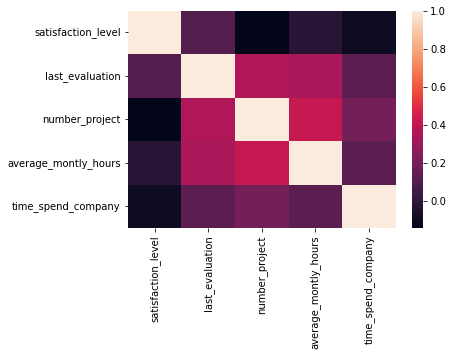

In [45]:
hr_data_numbers = hr_data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]
sns.heatmap(hr_data_numbers.corr())

Задание 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [19]:
dept_count = hr_data.groupby('department').count()[['satisfaction_level']]
dept_count.columns = ['Count']
dept_count

,Count
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


Задание 5. Показать распределение сотрудников по зарплатам.

<AxesSubplot:title={'center':'Распределение сотрудников по зарплате'}, xlabel='salary'>

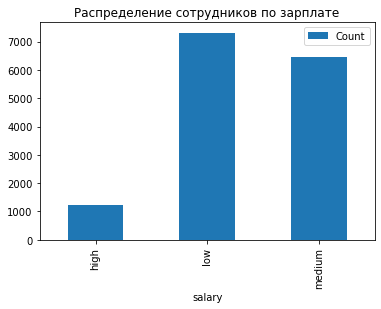

In [20]:
salary_distrib = hr_data[['salary','satisfaction_level']].groupby('salary').count()
salary_distrib.columns = ['Count']
salary_distrib.plot(kind='bar', 
                      title = 'Распределение сотрудников по зарплате')

Задание 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

<AxesSubplot:title={'center':'Распределение сотрудников по зарплате'}, xlabel='department'>

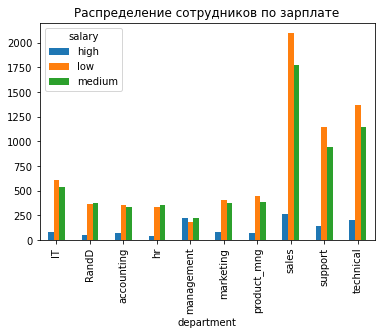

In [25]:
hr_data_pivot = hr_data.pivot_table(index = 'department',
                                    columns = 'salary',
                                    values = 'satisfaction_level',
                                    aggfunc = 'count')
hr_data_pivot.plot(kind='bar', 
                    title = 'Распределение сотрудников по зарплате')

Задание 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

Нулевая гипотеза предплагает, что время, проведенное на работе не отличается в двух группах сотрудников. В качестве альтернативной примем гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом. Для проверки гипотезы расчитаем p-value (за уровень значимости примем 5%) и критерий Стьюдента.

In [64]:
high_paid_employees = hr_data[ hr_data['salary'] == 'high' ]['average_montly_hours']
low_paid_employees = hr_data[ hr_data['salary'] == 'low' ]['average_montly_hours']


t , p  = stats.ttest_ind(high_paid_employees, low_paid_employees)
print('t = ' + str(t))
print('p = ' + str(p))

t = -0.7288680398062308
p = 0.4661023478267259


Значение p равное 0,466 доказывает, что средние значения двух распределений статистически неразличны. То есть мы отвергаем гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом. Крайне низкое значение критерия Стюдента также это подтверждает. Если визуализировать распределение двух выборок, то также можно увидеть, что значимых отличий нет.

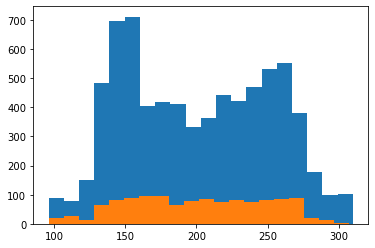

In [68]:
plt.hist(low_paid_employees, bins=20);
plt.hist(high_paid_employees, bins=20);

Задание 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [71]:
# Напишем функцию, которая будет расчитывать метрики
def metrics(table):
    promoted_share = table['promotion_last_5years'][table['promotion_last_5years'] == 1].count()/table['promotion_last_5years'].count()
    satisfaction_mean = table['satisfaction_level'].mean()
    number_projects_mean = table['number_project'].mean()
    print(f"Доля сотрудников с повышением за последние 5 лет: {round(promoted_share,3)}\n\
Средняя степень удовлетворенности: {round(satisfaction_mean,3)}\n\
Среднее количество проектов: {round(number_projects_mean,3)}")
    
# Разделим датасет на два по признаку работающий/уволившийся сотрудник
left_employees = hr_data[ hr_data['left'] == 1 ]
working_employees = hr_data[ hr_data['left'] == 0 ]

# Применим функцию к каждому датасету 
metrics(left_employees)
metrics(working_employees)

Доля сотрудников с повышением за последние 5 лет: 0.005
Средняя степень удовлетворенности: 0.44
Среднее количество проектов: 3.856
Доля сотрудников с повышением за последние 5 лет: 0.026
Средняя степень удовлетворенности: 0.667
Среднее количество проектов: 3.787


Задание 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке.

In [98]:
# Разделим датасет на предикторы и целевую переменную
outcome = hr_data['left'].values
data = hr_data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']]

In [112]:
# Разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(data, outcome, test_size=0.25)

# Импортируем LDA-функционал
lda = LinearDiscriminantAnalysis()

# Обучаем модель
lda.fit(X_train, y_train)

# Делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
# Смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,1
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
3745,0,0
3746,0,0
3747,0,0
3748,1,1


In [114]:
# Коэффициенты
lda.coef_

array([[-4.69670478e+00,  7.96478339e-01, -2.42104518e-01,
         4.36151217e-03,  2.32897940e-01, -1.12968362e+00,
        -1.09841530e+00]])

In [113]:
# Оценим точность модели
accuracy_score(y_test, lda.predict(X_test))

0.7488